In [2]:
import pandas as pd
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

data_path = os.getcwd()[:-len('notebooks')] + 'Data/'
db_Temp_path = data_path + 'TempFuturas/'
os.listdir(db_Temp_path)

['FinalGraphTemp.csv',
 'FinalGraphTemp.xlsx',
 'GlobalTemperatures.csv',
 'GlobalTemperaturesGZ.csv',
 'GlobalTemperaturesGZ.xlsx',
 '~$FinalGraphTemp.xlsx']

In [4]:
temperatures = pd.read_csv(db_Temp_path + 'GlobalTemperatures.csv')

In [5]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)

In [6]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()

In [7]:
df1 = df[df['Year'] >= 1975].reset_index()
df1 = df1.drop(['index'], axis = 1)
df1.head()

,Year,LandAverageTemperature
0,1975,8.744833
1,1976,8.347250
2,1977,8.850250
3,1978,8.692750
4,1979,8.733417


In [8]:
X1 = df1['Year']
y1 = df1['LandAverageTemperature']

X1 = X1.values.reshape(-1,1)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import math
import scipy.io

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1)                 2         
                                                                 
 dense_65 (Dense)            (None, 28)                56        
                                                                 
 dense_66 (Dense)            (None, 14)                406       
                                                                 
 dense_67 (Dense)            (None, 1)                 15        
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________
Epoch 1/65
2/2 [==============================] - 1s 6ms/step - loss: 2088597.1250
Epoch 2/65
2/2 [==============================] - 0s 12ms/step - loss: 1824862.8750
Epoch 3/65
2/2 [====

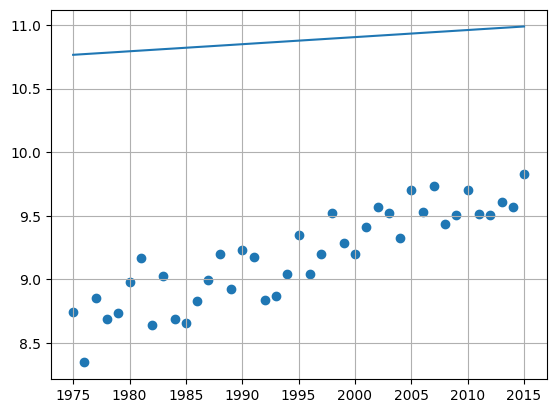

In [46]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 28, activation = 'linear'))
model.add(keras.layers.Dense(units = 14, activation = 'relu'))
#model.add(keras.layers.Dense(units = 32, activation = 'linear'))
model.add(keras.layers.Dense(units =1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer="adam")

model.summary()
model.fit( X1, y1, epochs=65, verbose=1)

y_predicted = model.predict(X1)

plt.scatter(X1[::1], y1[::1])
plt.plot(X1, y_predicted)
plt.grid()
plt.show()

In [47]:
print(model.predict(np.array([2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,
                              2026,2027,2028,2029,2030]).reshape(-1,1)))

1/1 [==============================] - 0s 58ms/step
[[10.993227]
 [10.998727]
 [11.004367]
 [11.009855]
 [11.015491]
 [11.021013]
 [11.026555]
 [11.032091]
 [11.037816]
 [11.043244]
 [11.048757]
 [11.054473]
 [11.060049]
 [11.06552 ]
 [11.071025]]


In [49]:
11.071025-10.110444 

0.9605810000000012

In [50]:
10.993227-0.9605810000000012

10.032645999999998

In [ ]:
print(model.predict(np.array([2016,2017,2018,2019,2020]).reshape(-1,1))-0.9605810000000012)

1/1 [==============================] - 0s 52ms/step
[[10.032646]
 [10.038146]
 [10.043786]
 [10.049274]
 [10.05491 ]]


In [91]:
print(model.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))

1/1 [==============================] - 0s 70ms/step
[[10.110444 ]
 [10.115426 ]
 [10.1203165]
 [10.12523  ]
 [10.130158 ]
 [10.135064 ]
 [10.140023 ]
 [10.144876 ]
 [10.149987 ]
 [10.154771 ]
 [10.159715 ]]


111.4860105

In [92]:
print("20-30")
print(model.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(model.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(model.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(model.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(model.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(model.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(model.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(model.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))


20-30
1/1 [==============================] - 0s 20ms/step
[[10.110444 ]
 [10.115426 ]
 [10.1203165]
 [10.12523  ]
 [10.130158 ]
 [10.135064 ]
 [10.140023 ]
 [10.144876 ]
 [10.149987 ]
 [10.154771 ]
 [10.159715 ]]
31-40
1/1 [==============================] - 0s 19ms/step
[[10.16462  ]
 [10.169602 ]
 [10.174523 ]
 [10.179322 ]
 [10.18435  ]
 [10.1893015]
 [10.194238 ]
 [10.19909  ]
 [10.204064 ]
 [10.209008 ]]
41-50
1/1 [==============================] - 0s 19ms/step
[[10.213807]
 [10.218728]
 [10.22368 ]
 [10.228684]
 [10.233476]
 [10.238549]
 [10.243379]
 [10.248361]
 [10.253228]
 [10.258096]]
51-60
1/1 [==============================] - 0s 19ms/step
[[10.263017]
 [10.268037]
 [10.27292 ]
 [10.277818]
 [10.282838]
 [10.287683]
 [10.29268 ]
 [10.297616]
 [10.302545]
 [10.307496]]
61-70
1/1 [==============================] - 0s 18ms/step
[[10.31231 ]
 [10.317216]
 [10.322137]
 [10.327104]
 [10.332032]
 [10.33693 ]
 [10.341874]
 [10.346841]
 [10.351769]
 [10.356698]]
71-80
1/1 [==========

In [ ]:
#original
print(model.predict(np.array([2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100]).reshape(-1,1)))